In [1]:
%matplotlib inline

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from IPython.display import clear_output
from scipy.stats import logistic
import tensorflow as tf

In [194]:
def scatter():
    colors = ['r' if l == 1 else 'b' for l in data[:,2]]

    # Graph points
    plt.gca().set_aspect('equal')
    fig = plt.scatter(data[:,0], data[:,1], c=colors, s=100)

In [195]:
# Visualize
def vis():
    res = 20
    pts = []
    for xi, xx in enumerate(np.linspace(-1.5, 1.5, res)):
        for yi, yy in enumerate(np.linspace(-1.5, 1.5, res)):
            pts.append([xx, yy, y.eval({x:[[xx], [yy]]})])
            
    pts = np.array(pts)
    colors = ['r' if z > 0 else 'b' for z in pts[:,2]]
    fig = plt.scatter(pts[:,0], pts[:,1], linewidths=0.0, c=colors, s=90, alpha=.3)

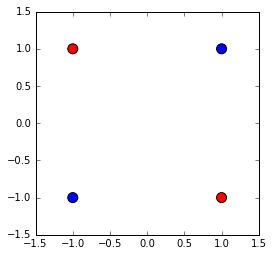

In [196]:
# Data points
data = np.array([[1,1,-1],
                [-1,1,1],
                [-1,-1,-1],
                [1,-1,1]])

scatter()

In [309]:
# Define network

IN = 2
HIDDEN = 6
OUT = 1

x = tf.placeholder(tf.float32, (IN, 1))
t = tf.placeholder(tf.float32, (OUT, 1))

W1 = tf.Variable(tf.random_normal((HIDDEN, IN)))
b1 = tf.Variable(tf.random_normal((HIDDEN, 1)))

W2 = tf.Variable(tf.random_normal((OUT, HIDDEN)))

h1 = tf.nn.relu(tf.matmul(W1, x) + b1)

y = tf.matmul(W2, h1)

cost = tf.square(y - t)

In [310]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

In [311]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

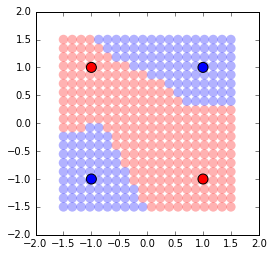

In [312]:
# Train
for i in range(1000):
    dp = data[np.random.randint(data.shape[0])]
    
    session.run(train, {x: [[dp[0]],[dp[1]]], t: [[dp[2]]]})
    
    if i % 100 == 0:
        clear_output(wait=True)
        vis()
        scatter()
        plt.show()